In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
np.random.seed(42)

In [3]:
# для завдання я обрав малий датасет на 100к, бо той що на 32 млн, досить помітно займає часу на обробку операцій з ним.
# завантажимо датасети і подивимось що вони собою являють.
# частини tags та links не будемо разглядати, бо ніякої для нас інформацї нової вони не несуть
ratings = pd.read_csv(r'C:\PythonProject\Python_Data_Science\data7\ratings.csv')
movies = pd.read_csv(r'C:\PythonProject\Python_Data_Science\data7\movies.csv')
ratings.describe(), movies.describe()
# можимо визначити що маємо достатньо розріджену структуру оцінок від 610 поціновувачив на 100к оцінок, і більшість користувачив 
# оцінявали невелику кількість фільмів. середні показники оцінок 3,5 з невеликим std майже одиниця
# дивлячись значення рейтингу по перцентілям можемо зробить висновок що дані зміщені близко рейтингу 4.

(              userId        movieId         rating     timestamp
 count  100836.000000  100836.000000  100836.000000  1.008360e+05
 mean      326.127564   19435.295718       3.501557  1.205946e+09
 std       182.618491   35530.987199       1.042529  2.162610e+08
 min         1.000000       1.000000       0.500000  8.281246e+08
 25%       177.000000    1199.000000       3.000000  1.019124e+09
 50%       325.000000    2991.000000       3.500000  1.186087e+09
 75%       477.000000    8122.000000       4.000000  1.435994e+09
 max       610.000000  193609.000000       5.000000  1.537799e+09,
              movieId
 count    9742.000000
 mean    42200.353623
 std     52160.494854
 min         1.000000
 25%      3248.250000
 50%      7300.000000
 75%     76232.000000
 max    193609.000000)

In [4]:
# з'еднаємо частини датасету, в один, можливо знадобится для визначення назви фільму і його жанрів на майбуьне. поєднання прведемо по id фільму
# і одразу видалимо часові мітки, і подивимось  як він виглядає in vivo
movie_rating = pd.merge(ratings, movies, left_on='movieId', right_on='movieId').drop('timestamp', axis=1)
movie_rating.head()

,userId,movieId,rating,title,genres
0,1,1,4.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,"Usual Suspects, The (1995)",Crime|Mystery|Thriller


In [5]:
# подивимось розмір датасету
movie_rating.shape

(100836, 5)

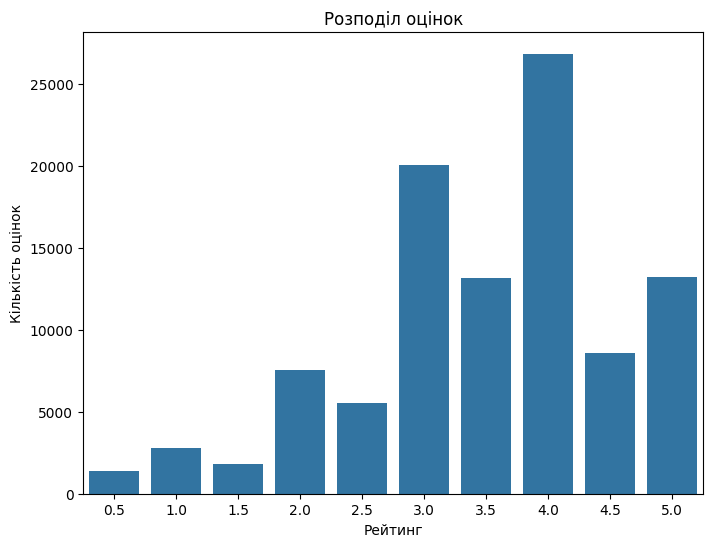

In [7]:
# Подивимось на розподіл оцінок
plt.figure(figsize=(8, 6))
sns.countplot(movie_rating, x='rating')
plt.title('Розподіл оцінок')
plt.xlabel('Рейтинг')
plt.ylabel('Кількість оцінок')
plt.show()

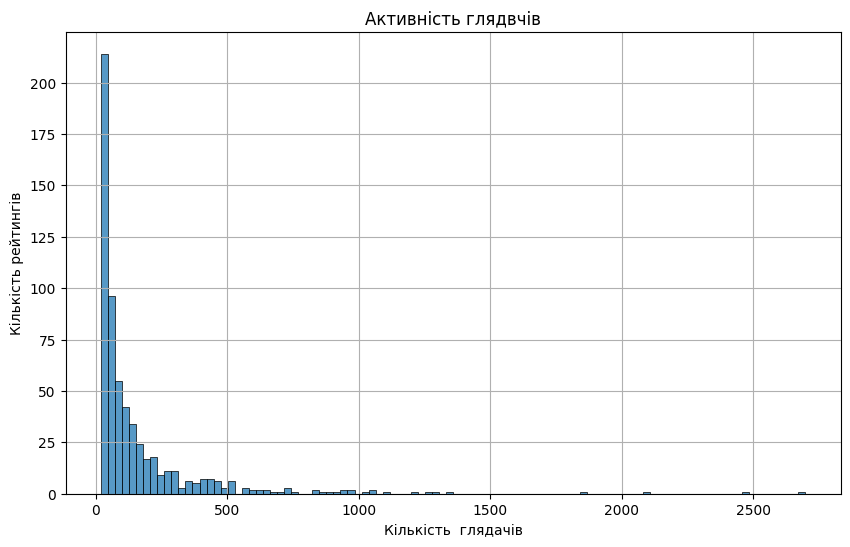

In [8]:
# Подивимось на активність глядачив.
# Наглядно можно побачити що оцінки глядачи роздавали досить мляво
user_ratings_count = movie_rating.groupby('userId')['rating'].count().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(user_ratings_count, bins=100)
plt.title('Активність глядвчів')
plt.xlabel('Кількість  глядачів')
plt.ylabel('Кількість рейтингів')
plt.grid()
plt.show()

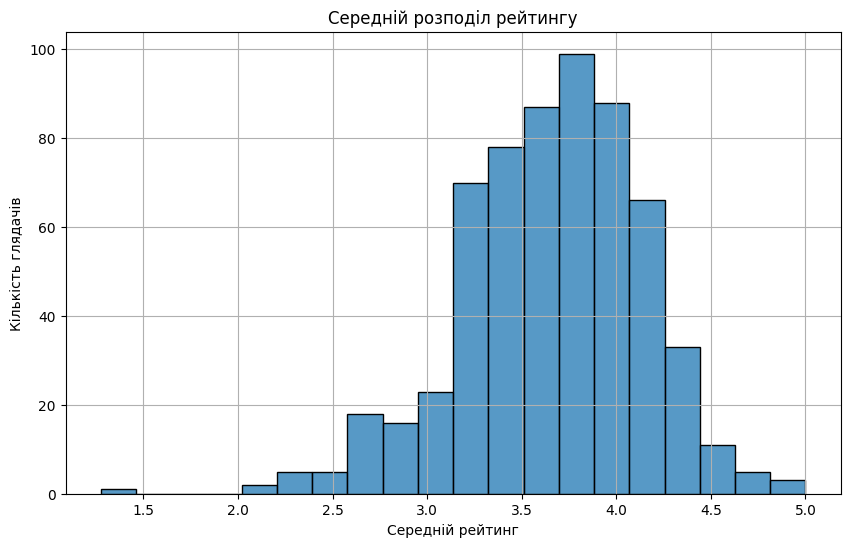

In [9]:
# Візуалізуємо розподіл рейтингів фільмів від кількості глядачів для більшої наглядності 
avg_rating = movie_rating.groupby('userId')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(avg_rating, bins=20)
plt.title('Середній розподіл рейтингу')
plt.xlabel('Середній рейтинг')
plt.ylabel('Кількість глядачів')
plt.grid()
plt.show()

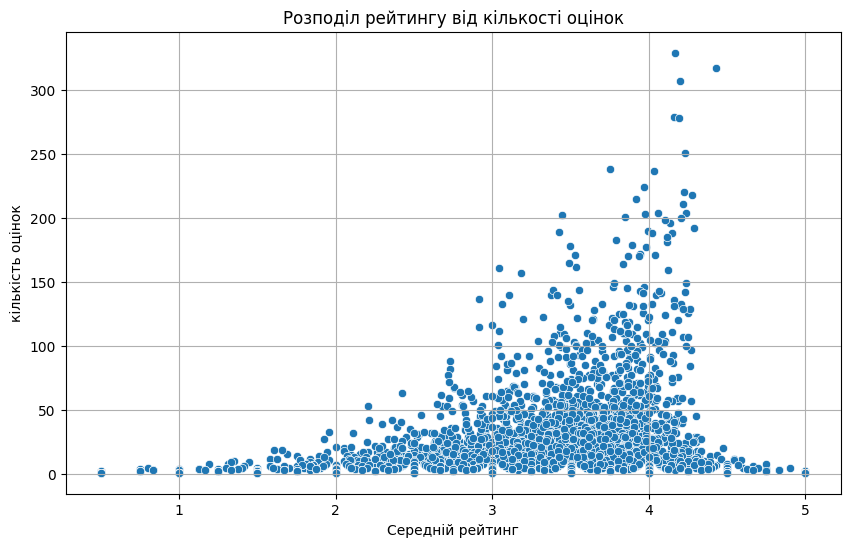

In [10]:
# Подтвтмось на кількість оцінок на фільм, щоб уявити активність глядвчів
df_ratings = pd.DataFrame(movie_rating.groupby('movieId')['rating'].mean())
df_ratings['total_ratings'] = pd.DataFrame(movie_rating.groupby('movieId')['rating'].count())
df_ratings.rename(columns = {'rating': 'mean_ratings'}, inplace=True)
df_ratings.sort_values('total_ratings', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.scatterplot(df_ratings, x='mean_ratings', y='total_ratings')
plt.title('Розподіл рейтингу від кількості оцінок')
plt.xlabel('Середній рейтинг')
plt.ylabel('кількість оцінок')
plt.grid()
plt.show()

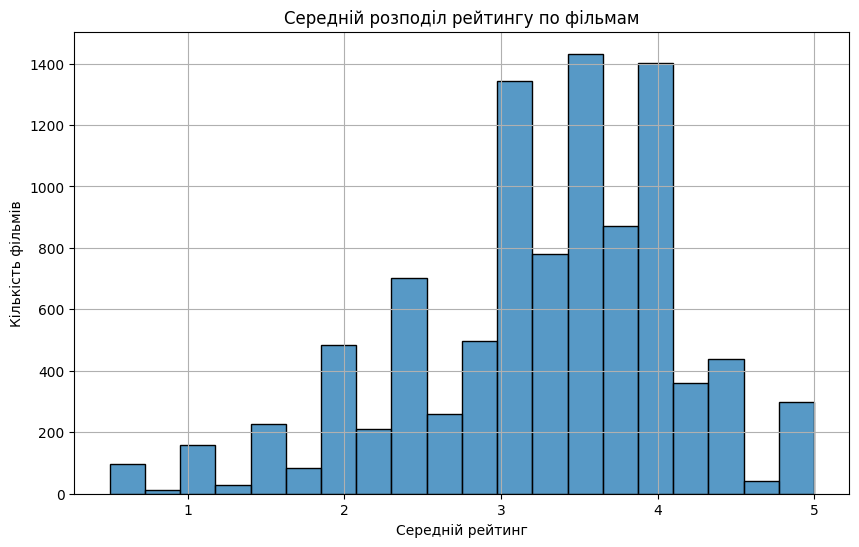

In [11]:
# Також можем подтвитись розподіл рейтингів до філму
avg_item_rating = movie_rating.groupby('movieId')['rating'].mean().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.histplot(avg_item_rating, bins=20)
plt.title('Середній розподіл рейтингу по фільмам')
plt.xlabel('Середній рейтинг')
plt.ylabel('Кількість фільмів')
plt.grid()
plt.show()

In [12]:
# порахуємо розрядженість наших даних
num_users = movie_rating['userId'].nunique()
num_items = movie_rating['movieId'].nunique()
num_ratings = len(movie_rating)
num_users, num_items

(610, 9724)

In [13]:
num_ratings, num_users * num_items
sparsity = 1 - (num_ratings / (num_users * num_items))
print(f"Sparsity of the rating matrix: {sparsity:.4f}")
# 98,3% порожнина!

Sparsity of the rating matrix: 0.9830


In [14]:
# для переконання глянемо на частинку цього порожньго апростору оцінок
df_saprsity = movie_rating.pivot_table(index = 'userId', columns = 'title', values = 'rating')
df_saprsity.head(20)

title,'71 (2014),'Hellboy': The Seeds of Creation (2004),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),'Tis the Season for Love (2015),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...,Zulu (2013),[REC] (2007),[REC]² (2009),[REC]³ 3 Génesis (2012),anohana: The Flower We Saw That Day - The Movie (2013),eXistenZ (1999),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931)
userId,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN


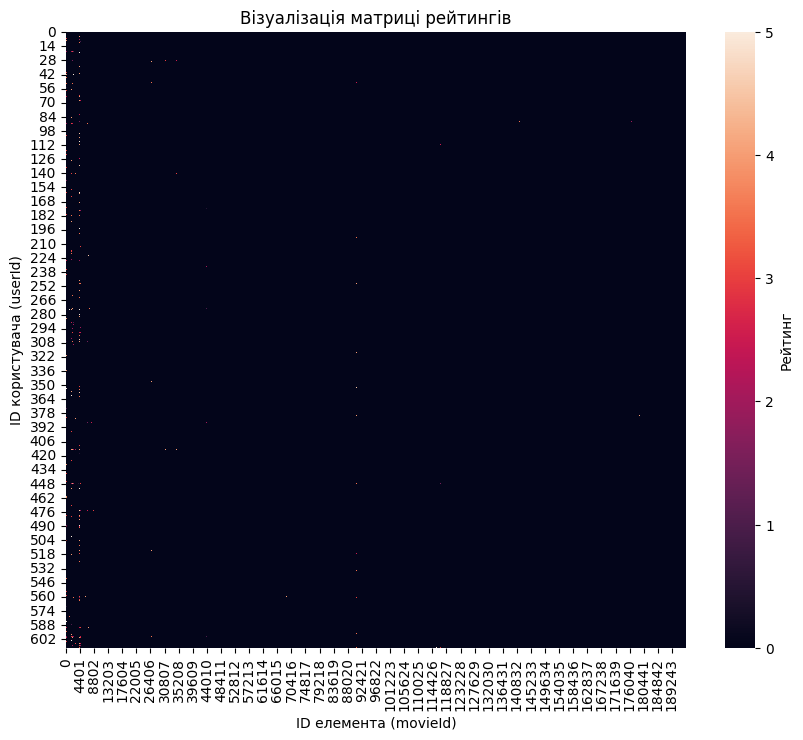

In [15]:
# Візуалізація матриці рейтингів (heatmap)
from scipy.sparse import csr_matrix

rating_matrix = csr_matrix((movie_rating['rating'], (movie_rating['userId'].to_numpy(dtype=int), movie_rating['movieId'].to_numpy(dtype=int))))
plt.figure(figsize=(10, 8))
sns.heatmap(rating_matrix.todense(), cbar_kws={'label': 'Рейтинг'})
plt.title('Візуалізація матриці рейтингів')
plt.xlabel('ID елемента (movieId)')
plt.ylabel('ID користувача (userId)')
plt.show()

In [56]:
# Створення рекомендаційної моделі
from surprise import Dataset, Reader, SVD, SVDpp, NMF
from surprise.model_selection import train_test_split, cross_validate
from surprise import accuracy
from surprise.accuracy import rmse

In [39]:
# побудуємо обьект в форматі для бібліотеки Surprise
reader = Reader(rating_scale=(0.5, 5.0))
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader = reader)

# розділимо на тренувальний та тестовий набори
trainset, testset = train_test_split(data, test_size=0.2)

In [40]:
model_svd = SVD(n_factors=100, n_epochs=20, lr_all=0.005, reg_all=0.02)
model_svd.fit(trainset)

In [41]:
# зробимо передбачення який би рейт поставив юзер 20 для філма номер 110?
uid = str(20)  # raw user id (as in the ratings file). They are **strings**!
iid = str(110)  # raw item id (as in the ratings file). They are **strings**!

pred_svd = model_svd.predict(uid, iid, verbose=True)

user: 20         item: 110        r_ui = None   est = 3.50   {'was_impossible': False}


In [43]:
# Побудуемо модель матричної факторизації SVD використовучи кросс-валідацію
from surprise.model_selection import GridSearchCV
param_grid = {
    "n_factors": [15, 20, 25],  # по замовчуванню  100
    "n_epochs": [5, 10, 20],  # кілкість ітерацій SGD, по замовчуванню 20
    "lr_all": [0.002, 0.025, 0.125],  # швидкість навчання, по дефолту 0.005
    "reg_all": [0.08, 0.16, 0.32],  # регулярізація для параметрів, по замовчуванню 0.02
    }

grid_search_svd = GridSearchCV(
    SVD,
    param_grid,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

grid_search_svd.fit(data)

# створимо датасет зпараметрами та результатами, та відсортуємо по зростанню mean_test_rmse
pd.DataFrame.from_dict(grid_search_svd.cv_results)[[
    "mean_test_rmse", "mean_test_mae", "param_n_factors",
    "param_n_epochs", "param_lr_all", "param_reg_all"
]].sort_values("mean_test_rmse")

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   13.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 243 out of 243 | elapsed:  2.0min finished


,mean_test_rmse,mean_test_mae,param_n_factors,param_n_epochs,param_lr_all,param_reg_all
75,0.868614,0.664683,25,20,0.025,0.08
48,0.870779,0.666308,20,20,0.025,0.08
39,0.871019,0.668416,20,10,0.025,0.08
66,0.871022,0.668494,25,10,0.025,0.08
12,0.872051,0.669582,15,10,0.025,0.08
...,...,...,...,...,...,...
56,0.923860,0.721705,25,5,0.002,0.32
29,0.923961,0.721872,20,5,0.002,0.32
15,0.924079,0.708644,15,10,0.125,0.08
51,0.924532,0.709694,20,20,0.125,0.08


In [44]:
# Найкращі похибки і нвйкращі параметри
grid_search_svd.best_score, grid_search_svd.best_params

({'rmse': 0.8686140012268293, 'mae': 0.6646833442736848},
 {'rmse': {'n_factors': 25, 'n_epochs': 20, 'lr_all': 0.025, 'reg_all': 0.08},
  'mae': {'n_factors': 25, 'n_epochs': 20, 'lr_all': 0.025, 'reg_all': 0.08}})

In [45]:
# збережемо найкразу модель
best_model_svd = grid_search_svd.best_estimator["rmse"]

In [46]:
# проведемо кросс валідацію нашої моделі на 5 вибірках
cv_result = cross_validate(best_model_svd, data, measures=["RMSE", "MAE"], cv=5, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    0.8558  0.8616  0.8576  0.8629  0.8560  0.8588  0.0029  
MAE (testset)     0.6537  0.6590  0.6569  0.6607  0.6560  0.6573  0.0024  
Fit time          0.90    0.81    0.99    0.89    1.15    0.95    0.12    
Test time         0.23    0.38    0.20    0.19    0.44    0.29    0.10    


In [47]:
# зробимо ot ще раз пережбачення передбачення який би рейт поставив юзер 20 для філма номер 110?
best_model_svd.predict(uid=20, iid=110)
# прогноз змінився з 3,5 до 4,29

Prediction(uid=20, iid=110, r_ui=None, est=4.291748229155134, details={'was_impossible': False})

In [53]:
# порахуємо похибку для тестового набору
predictions_best_svd = best_model_svd.test(testset)
print('RMSE GridSearch:', accuracy.rmse(testset_predictions))

predictions_svd = model_svd.test(testset)
print('RMSE першої моделі:', accuracy.rmse(predictions_svd))
# RMSE першої моделі 0,868, найкращої моделі 0,6441

RMSE: 0.6441
RMSE GridSearch: 0.644121363426977
RMSE: 0.8686
RMSE першої моделі: 0.8685809465513854


In [50]:
# Зробимо розрахунок моделі га  алгоритмі SVD++ з найкращими параметрами знайденими в минулий раз для порівняння

model_svdpp = SVDpp(n_factors=25, n_epochs=20, lr_all=0.005, reg_all=0.08)
model_svdpp.fit(trainset)

In [54]:
# порахуємо похибку для тестового набору
predictions_svdpp = model_svdpp.test(testset)
accuracy.rmse(predictions_svdpp)

RMSE: 0.8670


0.8669642304784899

In [ ]:
# порівнюючи 2 досить різних показника RMSE цих двох алгоритмів при однакових параметрах можно зробить вмсновок, що для SVD++ варто теж провести кроссвалідаці.
# але розрахунок значно більше займає часу, навіть само тренування моделі  досить помітно відрізняются від попередньго, тож мабуть за особим запитом

In [59]:
# Розглянемо алгоритм NMF
model_nmf = NMF(n_factors=25, n_epochs=20 )
model_nmf.fit(trainset)

In [61]:
predictions_nmf = model_nmf.test(testset)
accuracy.rmse(predictions_nmf)

RMSE: 1.1910


1.1909640777630162

In [63]:
# можемо подивитись на пеоедбачення. як на мене виглядають дуже посередньо в порівнянні з svd 
predictions_nmf

[Prediction(uid=450, iid=3404, r_ui=4.0, est=4.423905277114525, details={'was_impossible': False}),
 Prediction(uid=15, iid=120466, r_ui=2.5, est=3.682994755741998, details={'was_impossible': False}),
 Prediction(uid=448, iid=45517, r_ui=3.0, est=3.8828902683061983, details={'was_impossible': False}),
 Prediction(uid=221, iid=1079, r_ui=5.0, est=5.0, details={'was_impossible': False}),
 Prediction(uid=314, iid=442, r_ui=2.0, est=3.3951122908069507, details={'was_impossible': False}),
 Prediction(uid=580, iid=1207, r_ui=0.5, est=5.0, details={'was_impossible': False}),
 Prediction(uid=489, iid=3994, r_ui=1.0, est=4.479381357137303, details={'was_impossible': False}),
 Prediction(uid=21, iid=74789, r_ui=2.5, est=3.141978024398952, details={'was_impossible': False}),
 Prediction(uid=64, iid=356, r_ui=4.0, est=5.0, details={'was_impossible': False}),
 Prediction(uid=312, iid=1991, r_ui=3.0, est=4.0817345328468395, details={'was_impossible': False}),
 Prediction(uid=348, iid=590, r_ui=4.0, 

In [68]:
param_grid_nmf = {"n_factors": [15, 20, 25], "n_epochs": [5, 10, 20] }
grid_search_nmf = GridSearchCV(
    NMF,
    param_grid_nmf,
    measures=["rmse", "mae"],
    cv=3,  
    refit=True,
    n_jobs=-1,
    joblib_verbose=2
)

grid_search_nmf.fit(data)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  27 out of  27 | elapsed:   20.8s finished


In [69]:
# Найкращі похибки і нвйкращі параметри
grid_search_nmf.best_score, grid_search_nmf.best_params
# дивлячись на результат можливо для покращення  моделі треба збільшити кількість єпох, а для зменшення перенавчання змешити n_factors, може навіть до 2

({'rmse': 0.9354869205946951, 'mae': 0.7119404267832886},
 {'rmse': {'n_factors': 15, 'n_epochs': 20},
  'mae': {'n_factors': 15, 'n_epochs': 20}})

In [70]:
# збережемо найкразу модель
best_model_nmf = grid_search_nmf.best_estimator["rmse"]

In [71]:
# порахуємо похибку для тестового набору
predictions_best_nmf = best_model_nmf.test(testset)
accuracy.rmse(predictions_best_nmf)

RMSE: 0.7051


0.7050958106416726

In [ ]:
# З того що  тут було пораховано найменше RMSE має алгоритм SVD, Але оскільки похибка у NMF відрізняется від SVD вього лише на 0.05, 
# а виконується він помітно шведше, я б обрав саме NMF